In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as cn

In [2]:
ThNoSh = pd.read_csv('5cmThNoShield')
Th1AlSh = pd.read_csv('5cmThAl1Shield')
Th2AlSh = pd.read_csv('5cmThAl2Shield')
Th3AlSh = pd.read_csv('5cmThAl3Shield')
Th4AlSh = pd.read_csv('5cmThAl4Shield')
Th1WSh = pd.read_csv('5cmThW1Shield')
Th2WSh = pd.read_csv('5cmThW2Shield')
Th3WSh = pd.read_csv('5cmThW3Shield')
UNoSh = pd.read_csv('5cmUNoShield')
U1WSh = pd.read_csv('5cmU1WShield')
U2WSh = pd.read_csv('5cmU2WShield')
U3WSh = pd.read_csv('5cmU3WShield')
U1AlSh = pd.read_csv('5cmU1AlShield')
U2AlSh = pd.read_csv('5cmU2AlShield')
U3AlSh = pd.read_csv('5cmU3AlShield')
U4AlSh = pd.read_csv('5cmU4AlShield')


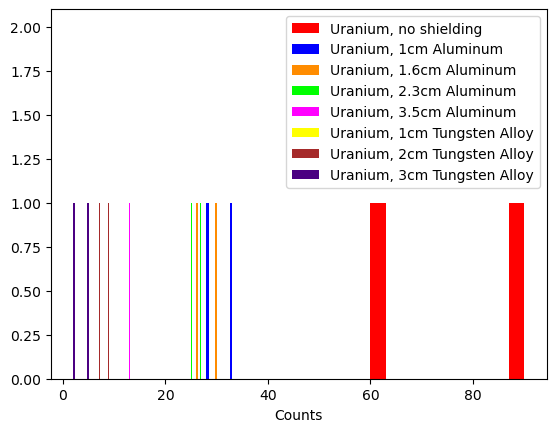

In [3]:
fig = plt.figure()
ax1 = plt.axes()

ax1.hist(UNoSh['Counts'], label = 'Uranium, no shielding', color = 'red')
ax1.hist(U1AlSh['Counts'], label = 'Uranium, 1cm Aluminum', color = 'blue')
ax1.hist(U2AlSh['Counts'], label = 'Uranium, 1.6cm Aluminum', color = 'darkorange')
ax1.hist(U3AlSh['Counts'], label = 'Uranium, 2.3cm Aluminum', color = 'lime')
ax1.hist(U4AlSh['Counts'], label = 'Uranium, 3.5cm Aluminum', color = 'fuchsia')
ax1.hist(U1WSh['Counts'], label = 'Uranium, 1cm Tungsten Alloy', color = 'yellow')
ax1.hist(U2WSh['Counts'], label = 'Uranium, 2cm Tungsten Alloy', color = 'brown')
ax1.hist(U3WSh['Counts'], label = 'Uranium, 3cm Tungsten Alloy', color = 'indigo')

ax1.set(xlabel = 'Counts')
plt.legend()
plt.show(ax1)

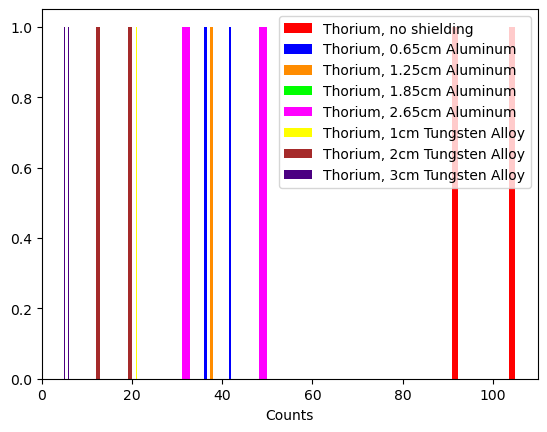

In [4]:
fig = plt.figure()
ax1 = plt.axes()

ax1.hist(ThNoSh['Counts'], label = 'Thorium, no shielding', color = 'red', )
ax1.hist(Th1AlSh['Counts'], label = 'Thorium, 0.65cm Aluminum', color = 'blue')
ax1.hist(Th2AlSh['Counts'], label = 'Thorium, 1.25cm Aluminum', color = 'darkorange')
ax1.hist(Th3AlSh['Counts'], label = 'Thorium, 1.85cm Aluminum', color = 'lime')
ax1.hist(Th4AlSh['Counts'], label = 'Thorium, 2.65cm Aluminum', color = 'fuchsia')
ax1.hist(Th1WSh['Counts'], label = 'Thorium, 1cm Tungsten Alloy', color = 'yellow')
ax1.hist(Th2WSh['Counts'], label = 'Thorium, 2cm Tungsten Alloy', color = 'brown')
ax1.hist(Th3WSh['Counts'], label = 'Thorium, 3cm Tungsten Alloy', color = 'indigo')

ax1.set(xlabel = 'Counts')
plt.legend()
plt.show(ax1)

In [6]:
Ulist = np.array([UNoSh['Counts'],U1AlSh['Counts'],U2AlSh['Counts'],U3AlSh['Counts'],U4AlSh['Counts'],U1WSh['Counts'],U2WSh['Counts'],U3WSh['Counts']])
Umean = np.mean(Ulist, axis = 1)
Ustd = np.std(Ulist, axis = 1)
UCounting = np.array([])
for i in range(len(Ulist)):
    UCounting = np.append(UCounting, np.sqrt(np.sum(Ulist[i])))
print(Ustd)
print(UCounting)
print(Ustd > UCounting)

[15.   2.5  2.   1.   0.5  0.   1.   1.5]
[12.24744871  7.81024968  7.48331477  7.21110255  5.          5.29150262
  4.          2.64575131]
[ True False False False False False False False]


In [7]:
Thlist = np.array([ThNoSh['Counts'],Th1AlSh['Counts'],Th2AlSh['Counts'],Th3AlSh['Counts'],Th4AlSh['Counts'],Th1WSh['Counts'],Th2WSh['Counts'],Th3WSh['Counts']])
Thmean = np.mean(Ulist, axis = 1)
Thstd = np.std(Thlist, axis = 1)
ThCounting = np.array([])
for i in range(len(Thlist)):
    ThCounting = np.append(ThCounting, np.sqrt(np.sum(Thlist[i])))
print(Thstd)
print(ThCounting)
print(Thstd > ThCounting)

[7.  3.  3.5 0.5 9.5 0.5 4.  0.5]
[14.          8.83176087  8.30662386  7.68114575  9.          6.40312424
  5.65685425  3.31662479]
[False False False False  True False False False]


As we made a mistake in our data gathering, gathering in 1 minute increments instead of 10s increments, we can't make a proper histogram, but we can see a trend of number of counts decreasing with increasing shielding. 

As for the measured standard deviations, they fell quicker than counting statistics would assume. I believe it would be much more helpful to look at counting rate instead of total counts in this case, both in general and exacerbated by the incorrect counting time. Additionally, the count rate for thorium with 2.65cm of aluminum shielding is anomalously high and has a higher standard deviation than expected.

In [8]:
UCounts = np.sum(Ulist, axis = 1)
ThCounts = np.sum(Thlist, axis = 1)
UErr = np.sqrt(UCounts)
ThErr = np.sqrt(ThCounts)

UAlX = np.array([0, 1, 1.6, 2.3, 3.5])
UWX = np.array([1,2,3])
ThAlX = np.array([0, 0.65, 1.25, 1.85, 2.65])
ThWX = np.array([1,2,3])

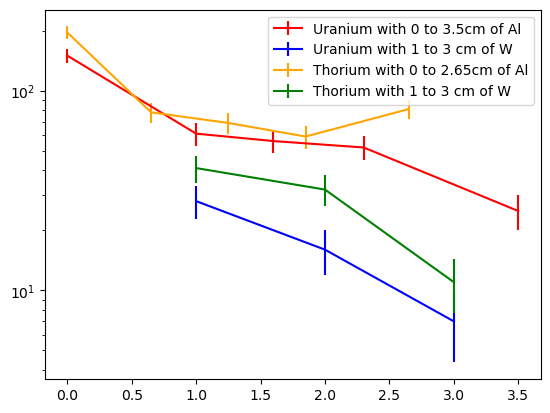

In [9]:
fig = plt.figure()
ax1 = plt.axes()

ax1.errorbar(UAlX, UCounts[0:5], UErr[0:5], color = 'red', label = 'Uranium with 0 to 3.5cm of Al')
ax1.errorbar(UWX, UCounts[5:], UErr[5:], color = 'blue', label = 'Uranium with 1 to 3 cm of W')
ax1.errorbar(ThAlX, ThCounts[0:5], ThErr[0:5], color = 'orange', label = 'Thorium with 0 to 2.65cm of Al')
ax1.errorbar(ThWX, ThCounts[5:], ThErr[5:], color = 'green', label = 'Thorium with 1 to 3 cm of W')
ax1.set(yscale = 'log')

plt.legend()
plt.show()

For the most part this follows the expectation exactly, other than the single outlier with the highest amount of aluminum shielding attenuating thorium. Before moving on to calculating the absorption coefficient, since I'm doing both U and Th at the same time I'll respond to 3.5 now. I would expect that the measured coefficients will be slightly different due to a difference in gamma ray energies attenuating at a different rate. 

$$\mu = \frac{ln(\frac{I_1}{I_2})}{\Delta x}$$

I'm going to estimate from two points for each set. For shielding with Al, points 2 and 3 will be used. For shielding with W, points 1 and 2 will be used.

In [10]:
UmuAl = np.log(UCounts[1]/UCounts[2])/(UAlX[2] - UAlX[1])
UmuW = np.log(UCounts[5]/UCounts[6]) #Each plate was 1cm, dividing by 1
ThmuAl = np.log(ThCounts[1]/ThCounts[2])/(ThAlX[2] - ThAlX[1])
ThmuW = np.log(ThCounts[5]/ThCounts[6])

print(f'The linear attenuation coefficient of uranium gamma rays in aluminum is {UmuAl:.3f}')
print(f'The linear attenuation coefficient of uranium gamma rays in tungsten is {UmuW:.3f}')
print(f'The linear attenuation coefficient of thorium gamma rays in aluminum is {ThmuAl:.3f}')
print(f'The linear attenuation coefficient of thorium gamma rays in tungsten is {ThmuW:.3f}')

The linear attenuation coefficient of uranium gamma rays in aluminum is 0.143
The linear attenuation coefficient of uranium gamma rays in tungsten is 0.560
The linear attenuation coefficient of thorium gamma rays in aluminum is 0.204
The linear attenuation coefficient of thorium gamma rays in tungsten is 0.248
